<h1>Task 2: Determining which sound has a secret code and extracting code </h1>

Import libraries and read the sounds to get the wave and sample rate of the sound

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import *
from scipy.io import wavfile as wv
from scipy import signal
import thinkdsp
from thinkdsp import CosSignal

sr1, sound1 = wv.read("sounds/Ex3_sound2.wav")
sr2, sound2 = wv.read("sounds/Ex3_sound3.wav")
sr3, sound3 = wv.read("sounds/Ex3_sound4.wav")

Creating a function that can be used to plot the frequency spectrum. It takes the sound and the sampling rate as arguments.
I used the fftfreq function in the scipy library which takes in the length of the window and the inverse of the sampling rate as the arguments to give an array of the frequency bins. 
I then used the fft function to get the values for the yaxis.
Next, I used the absolute function in the numpy library and used it to plot the graph.

In [2]:
def freq(sound, sr):
    N = len(sound)
    Xaxis = fftfreq(N, 1 / sr)
    Yaxis = fft(sound)
    plt.plot(np.abs(Xaxis), np.abs(Yaxis))

frequency spectrum for sound2.wav as we can see below there are no hidden code in the ultrasonic range of frequencies

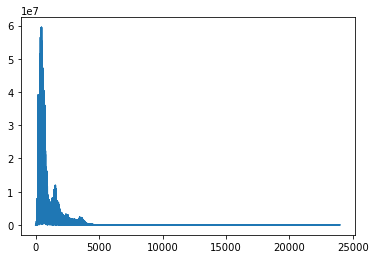

In [3]:
freq(sound1, sr1)

frequency spectrum for sound3.wav as we can see below there are no hidden code in the ultrasonic range of frequencies

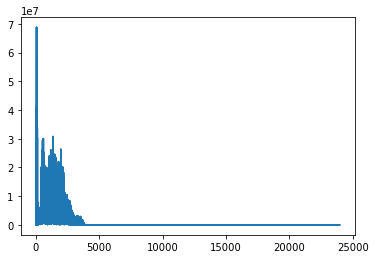

In [4]:
freq(sound2, sr2)

frequency spectrum for sound4.wav as we can see below that there seems to be some information in the ultrasonic frequencies

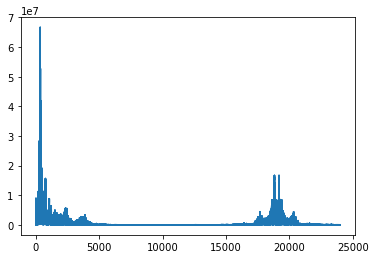

In [5]:
freq(sound3, sr3)

Using the thinkdsp library to create a highpass filter to get a better look at sound 4

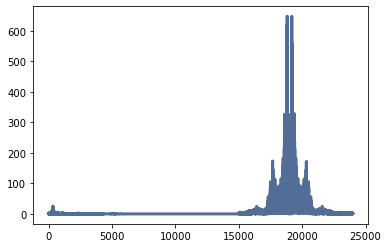

In [6]:
sound4 = thinkdsp.read_wave("sounds/Ex3_sound4.wav")

freqSpec = sound4.make_spectrum()
freqSpec.high_pass(cutoff = 15000, factor = 0.01)
freqSpec.plot()

Creating a function to demodulate the signal
<p>First we need to create a carrier wave by first creating a carrier signal then making a wave with the signal</p>
<p>To demodulate it the sound is multiplied by the carrier wave </p>

In [7]:
def demodulate(freq, sound):
    carrier_sig = CosSignal(freq = freq)
    carrier_wave = carrier_sig.make_wave(duration = sound.duration, framerate = sound.framerate)
    demodulated = sound * carrier_wave
    return demodulated

In [8]:
msg = demodulate(19000, sound4)
msg.make_audio()

As we can hear from above, the sound is sounding very distorted so I wanted to see the spectrum to see what is wrong

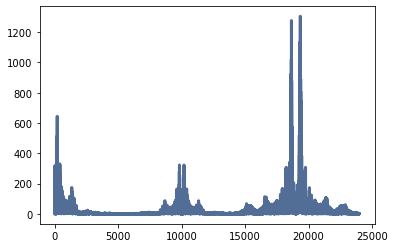

In [9]:
msg_spectrum = msg.make_spectrum()
msg_spectrum.plot()

Since there seems to be some issues at the higher frequencies, I decided to add a low pass filter with a cut off frequency of 5000hz

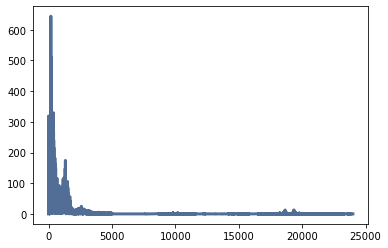

In [10]:
msg_spectrum.low_pass(cutoff = 5000, factor = 0.01)
msg_spectrum.plot()

In [11]:
full_msg = msg_spectrum.make_wave()
full_msg.make_audio()